### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 


X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
#importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [2]:
#importing data dictinory for reference
dic=pd.read_excel("Leads Data Dictionary.xlsx")
dic

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Variables,Description
2,NaN,Prospect ID,A unique ID with which the customer is identif...
3,NaN,Lead Number,A lead number assigned to each lead procured.
4,NaN,Lead Origin,The origin identifier with which the customer ...
5,NaN,Lead Source,"The source of the lead. Includes Google, Organ..."
6,NaN,Do Not Email,An indicator variable selected by the customer...
7,NaN,Do Not Call,An indicator variable selected by the customer...
8,NaN,Converted,The target variable. Indicates whether a lead ...
9,NaN,TotalVisits,The total number of visits made by the custome...


### Reading and Analyzing the Data

In [3]:
## Reading The Leads file
df=pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We can clearly see that there are lots of missing values in multiple columns and we have dataframe of 9240 x 37 

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [6]:
### Let's check the missing values in terms of %
round(100*(df.isnull().sum()/len(df)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

we can see that there are lots of missing values in multiple columns and the figures are alarming in most of these attributes. Deleting those will create a huge impact in our analysis hence let's analyze each attribute invidually for more in depth insights



- Country                                          26.63
- Specialization                                   15.56
- How did you hear about X Education               23.89
- hat is your current occupation                  29.11
- What matters most to you in choosing a course    29.32
- Tags                                             36.29
- Lead Quality                                     51.59
- Lead Profile                                     29.32
- City                                             15.37
- Asymmetrique Activity Index                      45.65
- Asymmetrique Profile Index                       45.65
- Asymmetrique Activity Score                      45.65
- Asymmetrique Profile Score                       45.65





In [7]:
## Let's start with high % attributes
df['Lead Quality'].isnull().sum()

4767

In [8]:
df['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

In [9]:
df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [10]:
df['Asymmetrique Activity Index'].isnull().sum()

4218

In [11]:
df['Asymmetrique Activity Index'].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [12]:
df['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [13]:
df['Asymmetrique Profile Index'].isnull().sum()

4218

In [14]:
df['Asymmetrique Profile Index'].unique()

array(['02.Medium', '01.High', '03.Low', nan], dtype=object)

In [15]:
df['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [16]:
df['Asymmetrique Activity Score'].isnull().sum()

4218

In [17]:
df['Asymmetrique Activity Score'].unique()

array([15., 14., 13., 17., 16., 11., 12., 10.,  9.,  8., 18., nan,  7.])

In [18]:
df['Asymmetrique Activity Score'].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [19]:
df['Asymmetrique Profile Score'].isnull().sum()

4218

In [20]:
df['Asymmetrique Profile Score'].unique()

array([15., 20., 17., 18., 14., 16., 13., 19., 12., nan, 11.])

In [21]:
df['Asymmetrique Profile Score'].value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [22]:
### after analyzing high % missing attributes found that these values will not add much values towards the model buidling rather will create highes biasness
### Hence dropping this columns
df=df.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Quality'],axis=1)

In [23]:
df.shape

(9240, 32)

###### Let's analyse the rest of the high missing % attributes
- Country                                          26.63
- Specialization                                   15.56
- How did you hear about X Education               23.89
- hat is your current occupation                   29.11
- What matters most to you in choosing a course    29.32
- Tags                                             36.29
- Lead Profile                                     29.32
- City 

In [24]:
df['Tags'].isnull().sum()

3353

In [25]:
df['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', nan, 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [26]:
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [27]:
## after analyzing the context of the attribute found that it won't add much values towards model building hence dropped it
df=df.drop('Tags',axis=1)


In [28]:
df['What matters most to you in choosing a course'].isnull().sum()

2709

In [29]:
df['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [30]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
## this attribute is highly skewed and not much valueable hence dropping
df=df.drop('What matters most to you in choosing a course',axis=1)

In [32]:
df['Lead Profile'].isnull().sum()

2709

In [33]:
df['Lead Profile'].unique()

array(['Select', 'Potential Lead', nan, 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

In [34]:
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [35]:
## Seems student had not selected the option for the column which is why it shows 'Select'. hence dropp the columns
df=df.drop('Lead Profile',axis=1)

In [36]:
df.shape

(9240, 29)

In [37]:
## Let's check the missing value again
round(100*(df.isnull().sum()/len(df)),2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                     26.63
Specialization                              15.56
How did you hear about X Education          23.89
What is your current occupation             29.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00


 Now we can see that there are only couple of columns which needs to be handled and let's analyze those:-
- Country                                     26.63
- Specialization                              15.56
- How did you hear about X Education          23.89
- What is your current occupation             29.11
- City                                        15.37

In [38]:
df['Country'].isnull().sum()

2461

In [39]:
df['Country'].unique()

array([nan, 'India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana',
       'Singapore', 'Qatar', 'Saudi Arabia', 'Belgium', 'France',
       'Sri Lanka', 'China', 'Canada', 'Netherlands', 'Sweden', 'Nigeria',
       'Hong Kong', 'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya',
       'Italy', 'South Africa', 'Tanzania', 'unknown', 'Malaysia',
       'Liberia', 'Switzerland', 'Denmark', 'Philippines', 'Bangladesh',
       'Vietnam', 'Indonesia'], dtype=object)

In [40]:
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Uganda                     2
Netherlands                2
Ghana                      2
Belgium                    2
Asia/Pacific Region        2
Italy                      2
Philippines                2
Bangladesh                 2
China                      2
Sri Lanka                  1
Kenya                      1
Switzerland                1
Indonesia                  1
Liberia                    1
Tanzania                   1
Denmark       

In [41]:
# we can clearly see that almost all of our students are based in India and only few of them are based outside
# Let's analyze the city columns to be more specific about these countries


In [42]:
df['City'].isnull().sum()

1420

In [43]:
df['City'].unique()

array(['Select', 'Mumbai', nan, 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [44]:
df['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [45]:
## as you can clearly see that City is not very much clear to analyze hence removing the column
df=df.drop('City',axis=1)

In [46]:
## after analyzing the problem statement and the demographic attribute Country, found that it is not going to help much rather it will increase biasness towards India hence removing the attribute
df=df.drop('Country',axis=1)

In [47]:
df['Specialization'].isnull().sum()

1438

In [48]:
df['Specialization'].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [49]:
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [50]:
## This is an important attributes as per business perpestive hence imputing the column with random choice for select options and nans
df['Specialization']=df['Specialization'].replace('Select',np.nan) #converting Select to Nan values so we can use fillNa method to impute randomly

In [51]:
df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [52]:
df['Specialization'].isnull().sum()


3380

In [53]:
# We have converted select to nan now let's impute randomly
df['Specialization']=df['Specialization'].apply(lambda x : np.random.choice(df['Specialization'].dropna().unique()) if x is np.nan else x)

In [54]:
#Let's check
df['Specialization'].isnull().sum()

0

In [55]:
df['Specialization'].unique()

array(['Banking, Investment And Insurance', 'Healthcare Management',
       'Business Administration', 'Media and Advertising',
       'Retail Management', 'Services Excellence',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Hospitality Management', 'Rural and Agribusiness',
       'International Business', 'E-COMMERCE', 'Operations Management',
       'E-Business'], dtype=object)

In [56]:
df['Specialization'].value_counts()

Finance Management                   1161
Human Resource Management            1040
Marketing Management                 1016
Operations Management                 698
Business Administration               580
IT Projects Management                535
Banking, Investment And Insurance     526
Supply Chain Management               518
Travel and Tourism                    391
International Business                383
Media and Advertising                 366
Healthcare Management                 343
Hospitality Management                317
E-COMMERCE                            316
Retail Management                     296
Rural and Agribusiness                273
E-Business                            251
Services Excellence                   230
Name: Specialization, dtype: int64

In [57]:
df['How did you hear about X Education'].isnull().sum()

2207

In [58]:
df['How did you hear about X Education'].unique()

array(['Select', 'Word Of Mouth', 'Other', nan, 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

In [59]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [60]:
## Since we don't have to focus on advertisement channel rather our business problem need more conversion ratio, we will drop this column
df=df.drop('How did you hear about X Education',axis=1)

In [61]:
df['What is your current occupation'].isnull().sum()

2690

In [62]:
df['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [63]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [64]:
##This attribute might contribute later towards model building so for time being we keep it and impute randomly instead of mode
## because the data is highly skwed towards unemployeed, using mode will only increase skewness
df['What is your current occupation']=df['What is your current occupation'].apply(lambda x: np.random.choice(df['What is your current occupation'].dropna().unique()) if x is np.nan else x)

In [65]:
#let's check
df['What is your current occupation'].isnull().sum()

0

In [66]:
df['What is your current occupation'].unique()

array(['Unemployed', 'Student', 'Housewife', 'Other',
       'Working Professional', 'Businessman'], dtype=object)

In [67]:
df['What is your current occupation'].value_counts()

Unemployed              6065
Working Professional    1172
Student                  655
Housewife                464
Businessman              443
Other                    441
Name: What is your current occupation, dtype: int64

In [68]:
# Let's check the overall df and missing values
round(100*(df.isnull().sum()/len(df)),2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

Most of our data is cleared, Let's check the remaining ones, The % is very less we can remove this or impute using mean or median. Let's check them:-
- Page Views Per Visit                        1.48
- Last Activity                               1.11
- TotalVisits                                 1.48
- Lead Source                                 0.39




In [69]:
df['Page Views Per Visit'].isnull().sum()

137

In [70]:
df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [71]:
#let's impute this with median values as there might be an outlier 
df['Page Views Per Visit']=df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

In [72]:
df['Page Views Per Visit'].isnull().sum()

0

In [73]:
df['Last Activity'].isnull().sum()

103

In [74]:
df['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked', nan,
       'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [75]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [76]:
df['Last Activity']=df['Last Activity'].fillna(df['Last Activity'].mode()[0])

In [77]:
df['Last Activity'].isnull().sum()

0

In [78]:
df['TotalVisits'].isnull().sum()

137

In [79]:
df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [80]:
#let's impute this with median values as there might be an outlier 
df['TotalVisits']=df['TotalVisits'].fillna(df['TotalVisits'].median())

In [81]:
df['TotalVisits'].isnull().sum()

0

In [82]:
df['Lead Source'].isnull().sum()

36

In [83]:
df['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', nan, 'blog', 'Pay per Click Ads', 'bing',
       'Social Media', 'WeLearn', 'Click2call', 'Live Chat',
       'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release',
       'NC_EDM'], dtype=object)

In [84]:
df['Lead Source']=df['Lead Source'].fillna(df['Lead Source'].mode()[0])

In [85]:
df['Lead Source'].isnull().sum()

0

In [86]:
df.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content 

All the missing values are handled

In [87]:
df.shape

(9240, 26)

In [88]:
df.head(20)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,No,No,No,No,No,No,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,...,No,No,No,No,No,No,No,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,...,No,No,No,No,No,No,No,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,...,No,No,No,No,No,No,No,No,No,Email Opened


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

We can see in the above dataset that there are couple of columns who values seems NO only. Let's double check those columns and if yes, will drop them

In [90]:
df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [91]:
# dropping these columns as more than 95% of the values are NO
df=df.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Do Not Call                             9240 non-null   object 
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9240 non-null   float64
 8   Total Time Spent on Website             9240 non-null   int64  
 9   Page Views Per Visit                    9240 non-null   float64
 10  Last Activity                           9240 non-null   obje

In [93]:
#Prospect ID is also not required
df=df.drop('Prospect ID',axis=1)

In [94]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,"Banking, Investment And Insurance",Unemployed,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Healthcare Management,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Retail Management,Unemployed,No,Modified


data has been thoroughly cleaned and ready for EDA

### EDA and Visualization

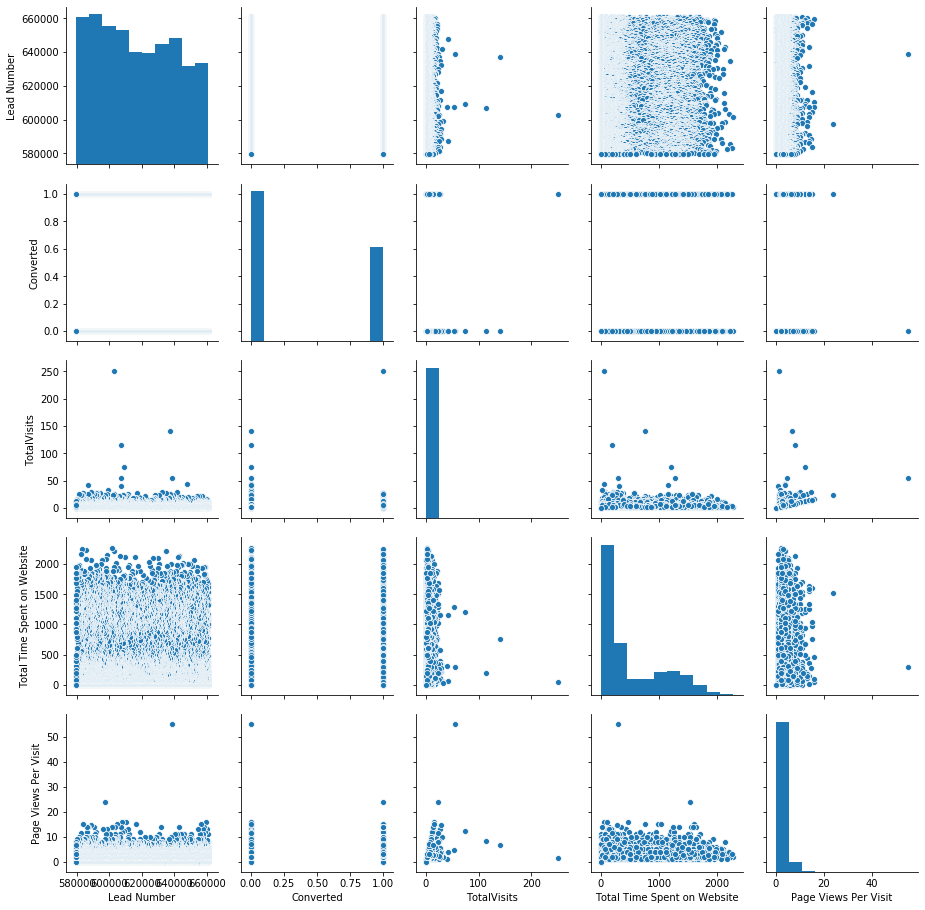

In [95]:
sns.pairplot(df)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Do Not Call                             9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Last Activity                           9240 non-null   object 
 10  Specialization                          9240 non-null   obje

In [97]:
##Counting plot for categorical variable
def cnt(col,df):
    plt.figure(figsize=(10,6))
    sns.countplot(col,hue='Converted',data=df)
    plt.xticks(rotation=90)

In [98]:
# Numerical distribution towards Target Variable
def num(col,df):
    plt.figure(figsize=(10,6))
    sns.FacetGrid(data=df,col='Converted',aspect=2,height=3).map(sns.distplot,col)
    plt.show()
        

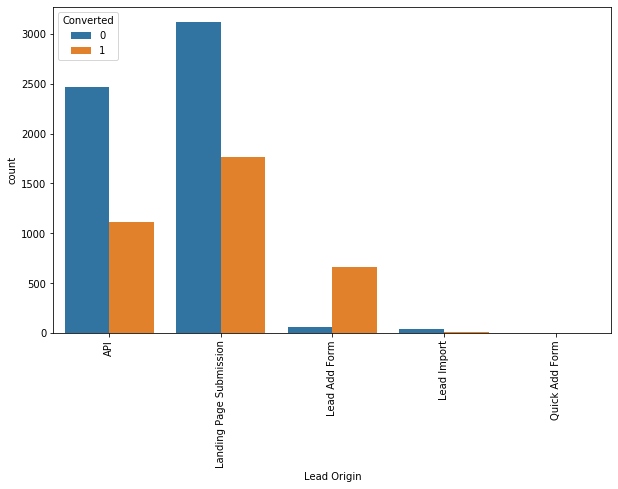

In [99]:
cnt("Lead Origin",df)

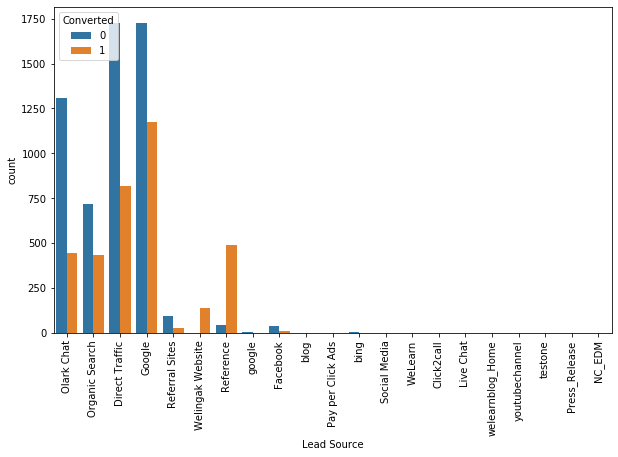

In [100]:
cnt("Lead Source",df)

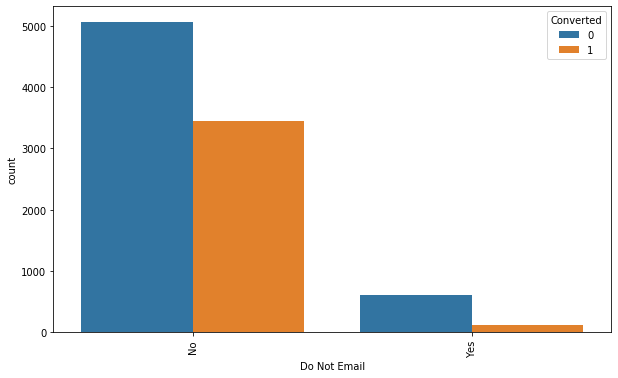

In [101]:
cnt("Do Not Email",df)

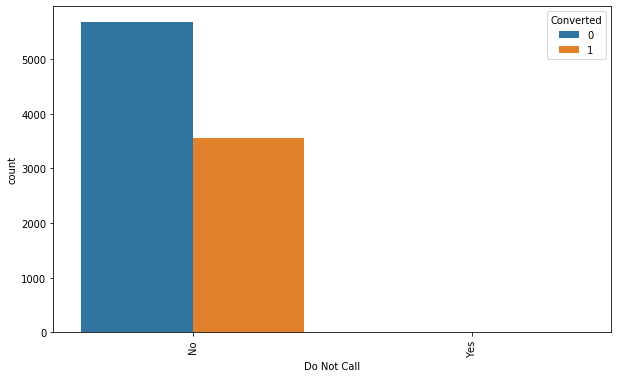

In [102]:
cnt("Do Not Call",df)

<Figure size 720x432 with 0 Axes>

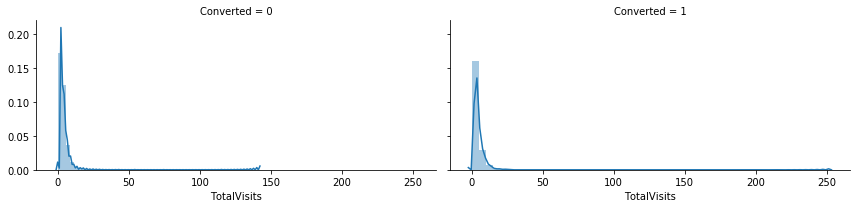

In [103]:
num("TotalVisits",df)

<Figure size 720x432 with 0 Axes>

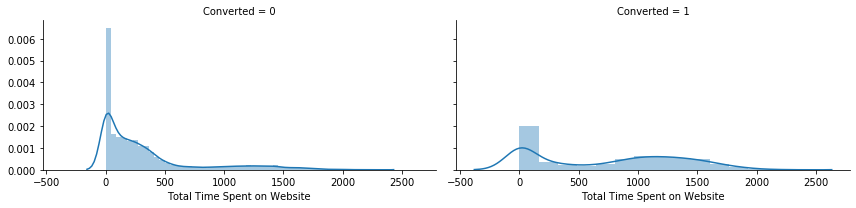

In [104]:
num("Total Time Spent on Website",df)

<Figure size 720x432 with 0 Axes>

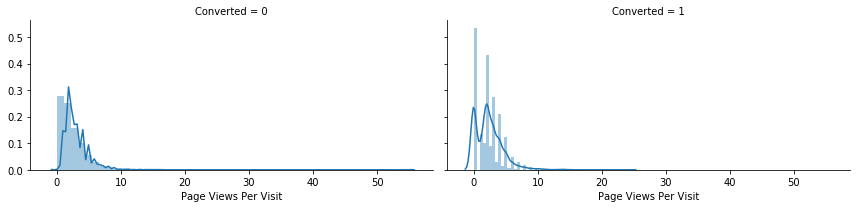

In [105]:
num("Page Views Per Visit",df)

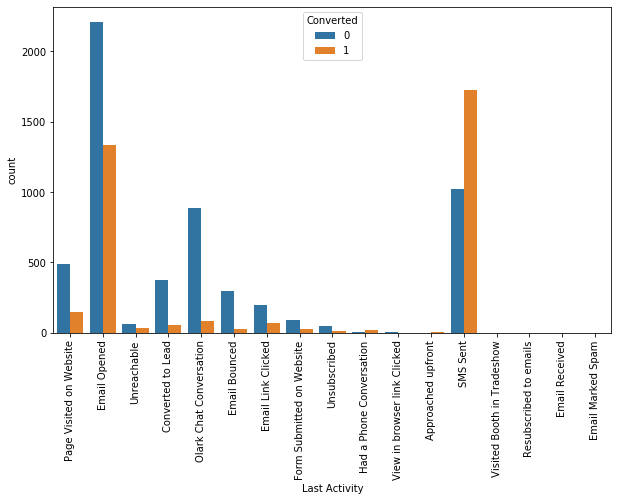

In [106]:
cnt("Last Activity",df)

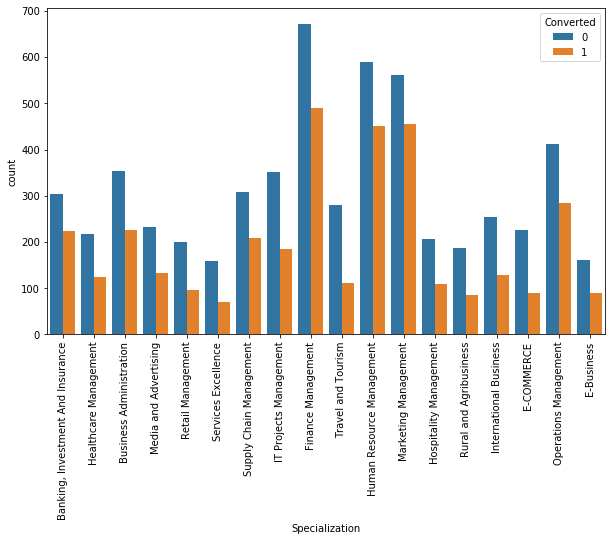

In [107]:
cnt("Specialization",df)

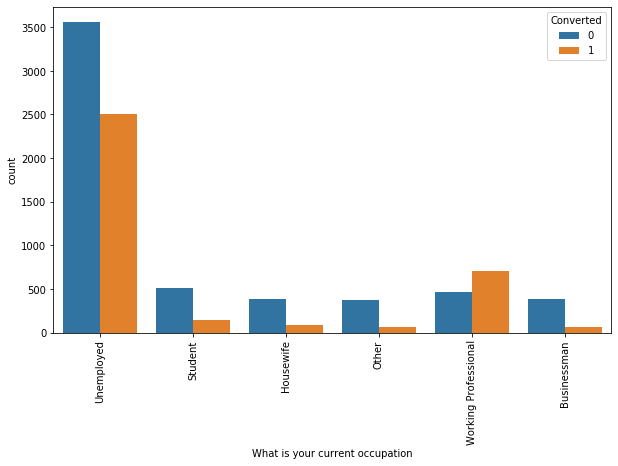

In [108]:
cnt("What is your current occupation",df)

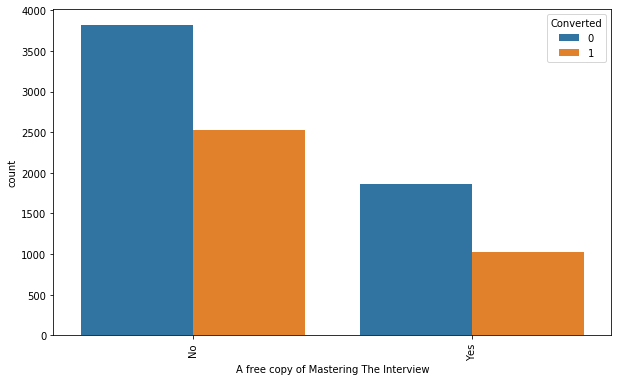

In [109]:
cnt("A free copy of Mastering The Interview",df)

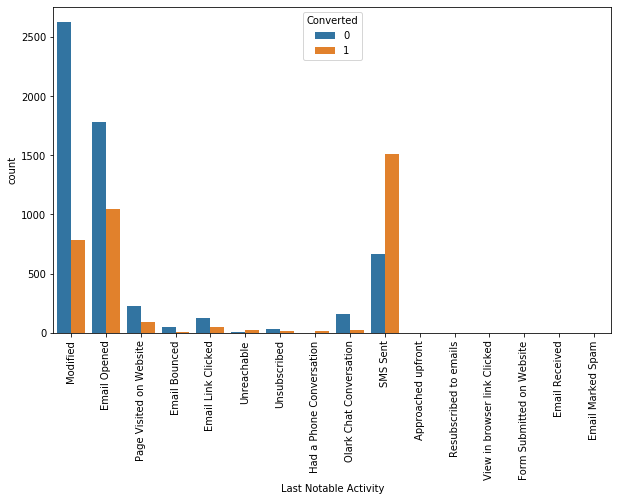

In [110]:
cnt("Last Notable Activity",df)

### Outliers Identification and Treatment

In [111]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


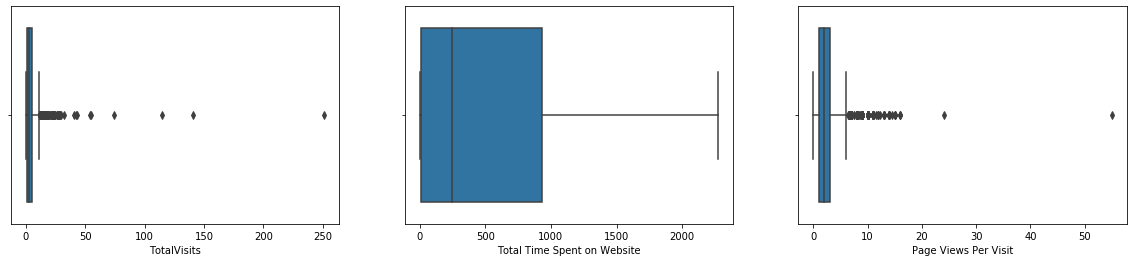

In [112]:
plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
sns.boxplot(df['TotalVisits'])

plt.subplot(1,3,2)
sns.boxplot(df['Total Time Spent on Website'])

plt.subplot(1,3,3)
sns.boxplot(df['Page Views Per Visit'])

plt.show()

In [113]:
## As we can clearly see that there are lot's of outlier and it can affect the whole model hence we will use IQR outlier treatment
# for TotalVisits
Q1=df['TotalVisits'].quantile(0.25)
Q3=df['TotalVisits'].quantile(0.75)
IQR=Q3-Q1
df=df[(df['TotalVisits'] >= Q1 - 1.5*IQR) & (df['TotalVisits'] <= Q3 + 1.5*IQR)]

# for 'Total Time Spent on Website'
Q1=df['Total Time Spent on Website'].quantile(0.25)
Q3=df['Total Time Spent on Website'].quantile(0.75)
IQR=Q3-Q1
df=df[(df['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (df['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]


# for 'Page Views Per Visit'
Q1=df['Page Views Per Visit'].quantile(0.25)
Q3=df['Page Views Per Visit'].quantile(0.75)
IQR=Q3-Q1
df=df[(df['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (df['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

In [114]:
#let's check
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8679.000000,8679.000000,8679.000000,8679.000000,8679.000000
mean,617159.511925,0.383915,2.813688,476.719899,2.075404
std,23363.674130,0.486366,2.416376,546.185697,1.640965
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.000000,0.000000,0.000000,0.000000,0.000000
50%,615563.000000,0.000000,3.000000,238.000000,2.000000
75%,637208.000000,1.000000,4.000000,912.000000,3.000000
max,660737.000000,1.000000,11.000000,2272.000000,6.000000


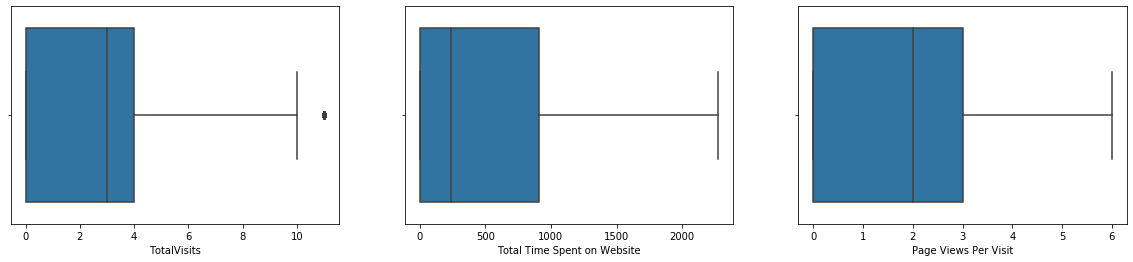

In [115]:
plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
sns.boxplot(df['TotalVisits'])

plt.subplot(1,3,2)
sns.boxplot(df['Total Time Spent on Website'])

plt.subplot(1,3,3)
sns.boxplot(df['Page Views Per Visit'])

plt.show()

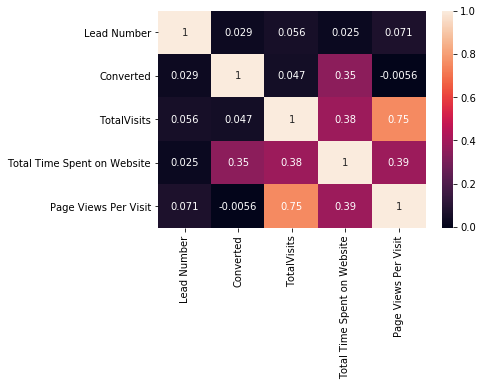

In [116]:
## LEt's check the correlation
sns.heatmap(df.corr(),annot=True)

We can see that TotalVisits and Page Views Per Visit is the only highly correlated attributes but we will not remove it as of now as it's only 0.75, We might removed one of them depending on the VIF score later during model building

### Data Preparation

In [117]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,"Banking, Investment And Insurance",Unemployed,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Healthcare Management,Unemployed,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Retail Management,Unemployed,No,Modified


In [118]:
#Let's convert some binary attributes(Yes/No) to 0,1
vars=['Do Not Email','Do Not Call','A free copy of Mastering The Interview']
def binary(x):
    return x.map({'Yes':1,'No':0})
df[vars]=df[vars].apply(binary)

In [119]:
df[['Do Not Email','Do Not Call','A free copy of Mastering The Interview']].head()

,Do Not Email,Do Not Call,A free copy of Mastering The Interview
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8679 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             8679 non-null   int64  
 1   Lead Origin                             8679 non-null   object 
 2   Lead Source                             8679 non-null   object 
 3   Do Not Email                            8679 non-null   int64  
 4   Do Not Call                             8679 non-null   int64  
 5   Converted                               8679 non-null   int64  
 6   TotalVisits                             8679 non-null   float64
 7   Total Time Spent on Website             8679 non-null   int64  
 8   Page Views Per Visit                    8679 non-null   float64
 9   Last Activity                           8679 non-null   object 
 10  Specialization                          8679 non-null   obje

In [121]:
## Let's create dummy variable for the rest of the categorical variable and drop the first one
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)


In [122]:
df=df.drop(['Lead Number','Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Last Notable Activity'],axis=1)

In [123]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [124]:
df.shape

(8679, 84)

In [125]:
df.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,8679.000000,8679.000000,8679.000000,8679.000000,8679.000000,8679.000000,8679.000000,8679.000000,8679.000000,8679.000000,...,8679.000000,8679.000000,8679.000000,8679.000000,8679.000000,8679.000000,8679.000000,8679.000000,8679.000000,8679.000000
mean,0.077313,0.000230,0.383915,2.813688,476.719899,2.075404,0.296117,0.513078,0.082152,0.006222,...,0.000115,0.001267,0.375504,0.020164,0.028459,0.000115,0.236087,0.003457,0.005185,0.000115
std,0.267103,0.015179,0.486366,2.416376,546.185697,1.640965,0.456570,0.499858,0.274612,0.078638,...,0.010734,0.035580,0.484281,0.140568,0.166291,0.010734,0.424701,0.058695,0.071824,0.010734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,238.000000,2.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,4.000000,912.000000,3.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,11.000000,2272.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8679 entries, 0 to 9239
Data columns (total 84 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          8679 non-null   int64  
 1   Do Not Call                                           8679 non-null   int64  
 2   Converted                                             8679 non-null   int64  
 3   TotalVisits                                           8679 non-null   float64
 4   Total Time Spent on Website                           8679 non-null   int64  
 5   Page Views Per Visit                                  8679 non-null   float64
 6   A free copy of Mastering The Interview                8679 non-null   int64  
 7   Lead Origin_Landing Page Submission                   8679 non-null   uint8  
 8   Lead Origin_Lead Add Form                             8679

### Data Modelling

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
x=df.drop('Converted',axis=1)

In [129]:
x.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [130]:
y=df.Converted
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=100)

In [132]:
x_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4746,0,0,4.0,21,4.0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2005,0,0,4.0,464,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4439,0,0,5.0,37,5.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7768,0,0,3.0,252,3.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6447,1,0,3.0,244,3.0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [133]:
x_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
475,0,0,0.0,0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2461,0,0,0.0,0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1890,0,0,2.0,169,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6007,0,0,3.0,94,1.5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4052,0,0,3.0,150,3.0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [134]:
y_train.head()

4746    0
2005    1
4439    0
7768    0
6447    0
Name: Converted, dtype: int64

In [135]:
y_test.head()

475     1
2461    1
1890    0
6007    0
4052    0
Name: Converted, dtype: int64

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
sc=StandardScaler()

In [138]:
x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=sc.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [139]:
x_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4746,0,0,0.490357,-0.835119,1.160768,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2005,0,0,0.490357,-0.022469,-0.050317,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4439,0,0,0.904062,-0.805768,1.766310,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7768,0,0,0.076652,-0.411367,0.555225,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6447,1,0,0.076652,-0.426043,0.555225,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [140]:
x_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6509.000000,6509.000000,6.509000e+03,6.509000e+03,6.509000e+03,6509.000000,6509.000000,6509.000000,6509.000000,6509.000000,...,6509.000000,6509.000000,6509.000000,6509.000000,6509.000000,6509.000000,6509.000000,6509.000000,6509.000000,6509.000000
mean,0.075588,0.000154,-1.253414e-16,2.111624e-17,1.708968e-16,0.292518,0.508527,0.082194,0.005838,0.000154,...,0.000154,0.001383,0.374712,0.020587,0.027654,0.000154,0.236288,0.003687,0.005070,0.000154
std,0.264358,0.012395,1.000077e+00,1.000077e+00,1.000077e+00,0.454954,0.499966,0.274681,0.076190,0.012395,...,0.012395,0.037162,0.484086,0.142008,0.163992,0.012395,0.424834,0.060615,0.071028,0.012395
min,0.000000,0.000000,-1.164463e+00,-8.736418e-01,-1.261402e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-1.164463e+00,-8.736418e-01,-1.261402e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,7.665207e-02,-4.407179e-01,-5.031706e-02,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,4.903571e-01,7.938490e-01,5.552254e-01,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,3.386293e+00,3.259314e+00,2.371853e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [141]:
## Now we can scale the data as well, Let's check the conversion rate as of now:-
round(100*(df.Converted.sum()/len(df.Converted)),2)

38.39

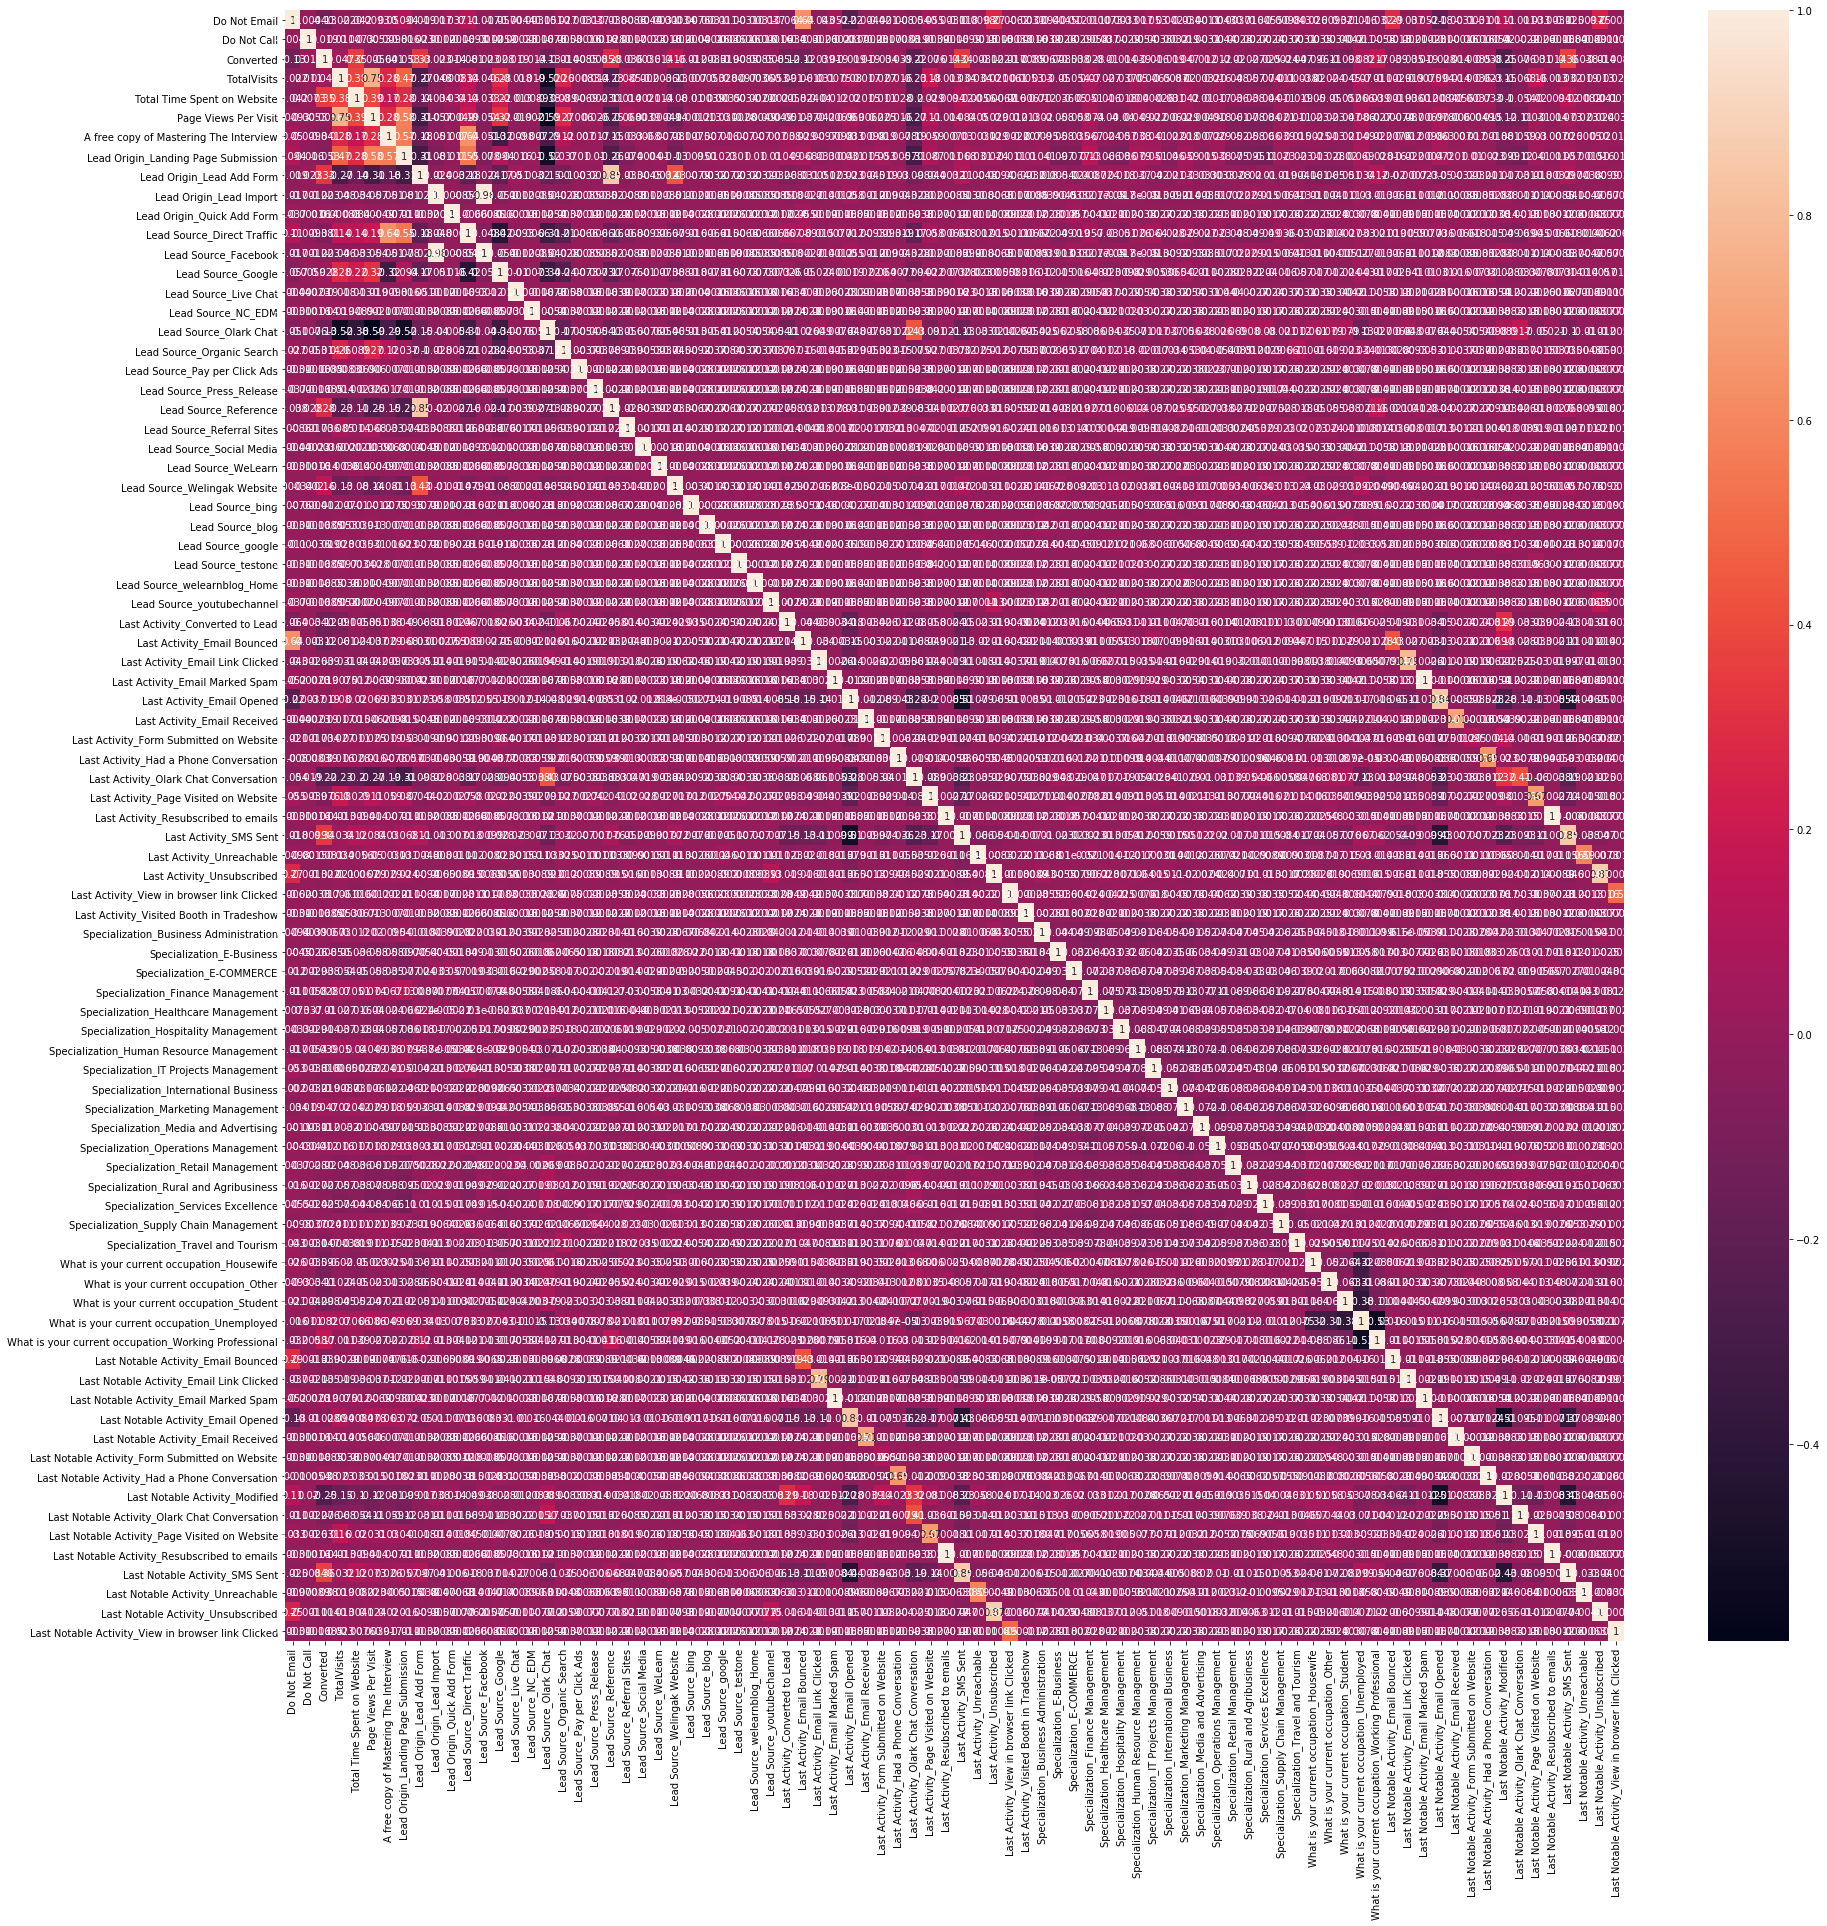

In [142]:
## Let's check the correlation among the attributes now:-
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [143]:
corr=df.corr()

In [144]:
corr.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.004395,-0.131819,-0.022136,-0.042049,0.009321,0.050369,0.093839,-0.019047,-0.017418,...,-0.003107,-0.010312,0.113171,-0.010833,0.033477,-0.003107,-0.024801,-0.009698,0.249403,-0.003107
Do Not Call,-0.004395,1.000000,0.019232,0.010596,0.007346,-0.005324,-0.009847,-0.015584,0.023102,-0.001201,...,-0.000163,-0.000541,0.019579,-0.002178,-0.002598,-0.000163,-0.008440,-0.000894,-0.001096,-0.000163
Converted,-0.131819,0.019232,1.000000,0.046652,0.350731,-0.005632,-0.041339,-0.052885,0.332400,-0.023294,...,-0.008474,0.038468,-0.247153,-0.076160,-0.031099,0.013599,0.360585,0.038277,-0.014106,-0.008474
TotalVisits,-0.022136,0.010596,0.046652,1.000000,0.383841,0.753189,0.276043,0.472505,-0.274061,-0.048478,...,-0.003615,0.022851,-0.153206,-0.067986,0.157447,-0.012500,0.032199,0.019166,0.012870,0.023041
Total Time Spent on Website,-0.042049,0.007346,0.350731,0.383841,1.000000,0.386161,0.171010,0.283636,-0.141323,-0.033802,...,-0.003729,0.033284,-0.101510,-0.054009,0.020428,-0.009370,0.123290,0.008161,0.004097,-0.007621


In [145]:
corr.to_csv('J:\corr.csv')

In [146]:
## AFTER ANALYZING THE CORRELATION FILE IN EXCEL DROPPING HIGHLY CORRELATED ATTRIBUTES
x_train=x_train.drop(["Lead Origin_Lead Add Form","Lead Origin_Lead Import","Last Notable Activity_Email Marked Spam","Last Notable Activity_Resubscribed to emails","Last Notable Activity_Unsubscribed"],axis=1)
x_test=x_test.drop(["Lead Origin_Lead Add Form","Lead Origin_Lead Import","Last Notable Activity_Email Marked Spam","Last Notable Activity_Resubscribed to emails","Last Notable Activity_Unsubscribed"],axis=1)

In [147]:
## Model building
import statsmodels.api as sm

In [148]:
log=sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
log.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6509
Model:                            GLM   Df Residuals:                     6432
Model Family:                Binomial   Df Model:                           76
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2664.2
Date:                Mon, 20 Jul 2020   Deviance:                       5328.5
Time:                        00:12:46   Pearson chi2:                 6.45e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   25.9092   2.74e+04      0.001      0.999   -5.38e+04    5.38e+04
Do Not Email                                            -1.0610      0.216     -4.902      0.000      -1.485      -0.637
Do Not Call                                             21.8641   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
TotalVisits                                              0.2304      0.053      4.342      0.000       0.126       0.334
Total Time Spent on Website                              1.1015      0.040     27.317      0.000       1.022       1.180
Page Views Per Visit                                    -0.2718      0.060     -4.512      0.000      -0.390      -0.154
A free copy of Mastering The Interview                   0.0250      0.110      0.228      0.820      -0.190       0.240
Lead Origin_Landing Page Submission                     -0.2175      0.110     -1.983      0.047      -0.432      -0.002
Lead Origin_Quick Add Form                              23.1486   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                              -2.4073      1.289     -1.868      0.062      -4.933       0.118
Lead Source_Facebook                                    -2.1172      1.356     -1.562      0.118      -4.774       0.540
Lead Source_Google                                      -2.0428      1.286     -1.589      0.112      -4.563       0.477
Lead Source_Live Chat                                   21.9747   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_NC_EDM                                      22.3836   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                  -1.2031      1.283     -0.938      0.348      -3.718       1.312
Lead Source_Organic Search                              -2.0416      1.290     -1.582      0.114      -4.571       0.488
Lead Source_Pay per Click Ads                          -23.8054   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                              -22.3481   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    1.6178      1.296      1.248      0.212      -0.922       4.158
Lead Source_Referral Sites                              -2.4618      1.324     -1.860      0.063      -5.056       0.132
Lead Source_Social Media                                23.1680   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_WeLearn                                   6.212e-09   1.82e-05      0.000      1.000   -3.57e-05    3.57e-05
Lead Source_Welingak Website                             3

In [149]:
## There are lots of attributes/feature for a manual exploration hence we will RFE to eliminate the least required ones

In [150]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [151]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)       
rfe = rfe.fit(x_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [152]:
rfe.support_

array([ True, False, False,  True, False, False, False, False,  True,
        True,  True, False, False, False,  True, False, False,  True,
        True, False, False,  True,  True, False,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False,  True,  True, False])

In [153]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 41),
 ('TotalVisits', False, 35),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 33),
 ('A free copy of Mastering The Interview', False, 55),
 ('Lead Origin_Landing Page Submission', False, 36),
 ('Lead Origin_Quick Add Form', False, 25),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 27),
 ('Lead Source_NC_EDM', False, 16),
 ('Lead Source_Olark Chat', False, 43),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 24),
 ('Lead Source_Press_Release', False, 49),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 3),
 ('Lead Source_WeLearn', False, 58),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', True, 1),
 ('Lead Source_blog', False, 17),
 ('Lead Source_google', True, 1),
 ('Lead Source_testo

In [154]:
col = x_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [155]:
x_train=x_train[col]
x_test=x_test[col]

In [156]:
X_train_sm = sm.add_constant(x_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6509
Model:                            GLM   Df Residuals:                     6488
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2736.1
Date:                Mon, 20 Jul 2020   Deviance:                       5472.2
Time:                        00:12:58   Pearson chi2:                 6.44e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8675      0.113     -7.675      0.000      -1.089      -0.646
Do Not Email                                            -1.0412      0.186     -5.597      0.000      -1.406      -0.677
Total Time Spent on Website                              1.0949      0.039     27.961      0.000       1.018       1.172
Lead Source_Direct Traffic                              -1.3913      0.113    -12.282      0.000      -1.613      -1.169
Lead Source_Facebook                                    -0.9623      0.453     -2.125      0.034      -1.850      -0.075
Lead Source_Google                                      -1.0123      0.107     -9.435      0.000      -1.223      -0.802
Lead Source_Organic Search                              -1.0863      0.135     -8.063      0.000      -1.350      -0.822
Lead Source_Reference                                    2.8268      0.218     12.966      0.000       2.399       3.254
Lead Source_Referral Sites                              -1.3880      0.325     -4.270      0.000      -2.025      -0.751
Lead Source_Welingak Website                             5.0970      1.011      5.042      0.000       3.115       7.078
Lead Source_bing                                       -21.5647   2.37e+04     -0.001      0.999   -4.65e+04    4.64e+04
Lead Source_google                                     -23.1060   2.27e+04     -0.001      0.999   -4.45e+04    4.44e+04
Last Activity_Converted to Lead                         -0.9907      0.194     -5.117      0.000      -1.370      -0.611
Last Activity_Email Bounced                             -0.7128      0.332     -2.147      0.032      -1.363      -0.062
Last Activity_Olark Chat Conversation                   -1.7244      0.169    -10.196      0.000      -2.056      -1.393
Last Activity_Resubscribed to emails                    24.3902   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
What is your current occupation_Unemployed               0.8449      0.095      8.859      0.000       0.658       1.032
What is your current occupation_Working Professional     1.6514      0.126     13.155      0.000       1.405       1.897
Last Notable Activity_Had a Phone Conversation           2.8469      1.147      2.483      0.013       0.600       5.094
Last Notable Activity_SMS Sent                           1.6022      0.079     20.233      0.000       1.447       1.757
Last Notable Activity_Unreachable                        1.9724      0.509      3.874      0.000       0.974       2.970
========================================================================================================================
"""

In [157]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,What is your current occupation_Unemployed,3.12
4,Lead Source_Google,2.02
2,Lead Source_Direct Traffic,1.90
0,Do Not Email,1.87
12,Last Activity_Email Bounced,1.80
16,What is your current occupation_Working Profes...,1.44
18,Last Notable Activity_SMS Sent,1.43
5,Lead Source_Organic Search,1.37
6,Lead Source_Reference,1.26
1,Total Time Spent on Website,1.17


In [158]:
# Let's drop the feature with high p-value as VIF seems fine
x_train=x_train.drop('Lead Source_google',axis=1)
x_test=x_test.drop('Lead Source_google',axis=1)

In [159]:
X_train_sm = sm.add_constant(x_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6509
Model:                            GLM   Df Residuals:                     6489
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2738.6
Date:                Mon, 20 Jul 2020   Deviance:                       5477.3
Time:                        00:12:58   Pearson chi2:                 6.44e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8784      0.113     -7.782      0.000      -1.100      -0.657
Do Not Email                                            -1.0404      0.186     -5.595      0.000      -1.405      -0.676
Total Time Spent on Website                              1.0923      0.039     27.931      0.000       1.016       1.169
Lead Source_Direct Traffic                              -1.3805      0.113    -12.199      0.000      -1.602      -1.159
Lead Source_Facebook                                    -0.9535      0.453     -2.107      0.035      -1.841      -0.066
Lead Source_Google                                      -1.0015      0.107     -9.346      0.000      -1.212      -0.792
Lead Source_Organic Search                              -1.0759      0.135     -7.992      0.000      -1.340      -0.812
Lead Source_Reference                                    2.8350      0.218     13.006      0.000       2.408       3.262
Lead Source_Referral Sites                              -1.3767      0.325     -4.239      0.000      -2.013      -0.740
Lead Source_Welingak Website                             5.1036      1.011      5.048      0.000       3.122       7.085
Lead Source_bing                                       -20.5552   1.44e+04     -0.001      0.999   -2.82e+04    2.82e+04
Last Activity_Converted to Lead                         -0.9897      0.194     -5.114      0.000      -1.369      -0.610
Last Activity_Email Bounced                             -0.7110      0.332     -2.142      0.032      -1.362      -0.060
Last Activity_Olark Chat Conversation                   -1.7174      0.169    -10.159      0.000      -2.049      -1.386
Last Activity_Resubscribed to emails                    23.3988   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
What is your current occupation_Unemployed               0.8469      0.095      8.885      0.000       0.660       1.034
What is your current occupation_Working Professional     1.6461      0.125     13.124      0.000       1.400       1.892
Last Notable Activity_Had a Phone Conversation           2.8462      1.146      2.483      0.013       0.599       5.093
Last Notable Activity_SMS Sent                           1.6032      0.079     20.256      0.000       1.448       1.758
Last Notable Activity_Unreachable                        1.9725      0.509      3.875      0.000       0.975       2.970
========================================================================================================================
"""

In [160]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,3.11
4,Lead Source_Google,2.02
2,Lead Source_Direct Traffic,1.90
0,Do Not Email,1.87
11,Last Activity_Email Bounced,1.80
15,What is your current occupation_Working Profes...,1.44
17,Last Notable Activity_SMS Sent,1.43
5,Lead Source_Organic Search,1.37
6,Lead Source_Reference,1.26
1,Total Time Spent on Website,1.17


In [161]:
x_train=x_train.drop('Lead Source_Facebook',axis=1)
x_test=x_test.drop('Lead Source_Facebook',axis=1)

In [162]:
X_train_sm = sm.add_constant(x_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6509
Model:                            GLM   Df Residuals:                     6490
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.2
Date:                Mon, 20 Jul 2020   Deviance:                       5482.4
Time:                        00:12:59   Pearson chi2:                 6.44e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9134      0.112     -8.151      0.000      -1.133      -0.694
Do Not Email                                            -1.0386      0.186     -5.584      0.000      -1.403      -0.674
Total Time Spent on Website                              1.0900      0.039     27.883      0.000       1.013       1.167
Lead Source_Direct Traffic                              -1.3421      0.112    -11.994      0.000      -1.561      -1.123
Lead Source_Google                                      -0.9634      0.106     -9.100      0.000      -1.171      -0.756
Lead Source_Organic Search                              -1.0381      0.134     -7.770      0.000      -1.300      -0.776
Lead Source_Reference                                    2.8719      0.217     13.209      0.000       2.446       3.298
Lead Source_Referral Sites                              -1.3383      0.324     -4.128      0.000      -1.974      -0.703
Lead Source_Welingak Website                             5.1418      1.011      5.087      0.000       3.161       7.123
Lead Source_bing                                       -20.5185   1.44e+04     -0.001      0.999   -2.82e+04    2.82e+04
Last Activity_Converted to Lead                         -0.9868      0.193     -5.101      0.000      -1.366      -0.608
Last Activity_Email Bounced                             -0.7119      0.332     -2.145      0.032      -1.362      -0.061
Last Activity_Olark Chat Conversation                   -1.6916      0.169    -10.028      0.000      -2.022      -1.361
Last Activity_Resubscribed to emails                    23.4318   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
What is your current occupation_Unemployed               0.8403      0.095      8.819      0.000       0.654       1.027
What is your current occupation_Working Professional     1.6446      0.125     13.111      0.000       1.399       1.890
Last Notable Activity_Had a Phone Conversation           2.8473      1.146      2.485      0.013       0.601       5.093
Last Notable Activity_SMS Sent                           1.6099      0.079     20.362      0.000       1.455       1.765
Last Notable Activity_Unreachable                        1.9781      0.509      3.887      0.000       0.981       2.975
========================================================================================================================
"""

In [163]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
13,What is your current occupation_Unemployed,3.06
3,Lead Source_Google,2.01
2,Lead Source_Direct Traffic,1.89
0,Do Not Email,1.87
10,Last Activity_Email Bounced,1.80
16,Last Notable Activity_SMS Sent,1.43
14,What is your current occupation_Working Profes...,1.43
4,Lead Source_Organic Search,1.37
5,Lead Source_Reference,1.26
1,Total Time Spent on Website,1.17


Looks' perfect hence let's predict

In [164]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4746    0.328362
2005    0.129959
4439    0.120311
7768    0.089055
6447    0.034689
5371    0.473726
4578    0.979005
2775    0.263980
7623    0.027724
1071    0.263980
dtype: float64

In [165]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.32836179, 0.12995935, 0.12031054, 0.08905501, 0.03468859,
       0.4737262 , 0.97900484, 0.26397993, 0.02772365, 0.26397993])

In [166]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Con_Prob':y_train_pred})

y_train_pred_final.head()

,Converted,Con_Prob
0,0,0.328362
1,1,0.129959
2,0,0.120311
3,0,0.089055
4,0,0.034689


In [167]:
#Let's create a new columns predicted when threshold is 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Con_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Con_Prob,predicted
0,0,0.328362,0
1,1,0.129959,0
2,0,0.120311,0
3,0,0.089055,0
4,0,0.034689,0


In [168]:
# Let's check the metrics
from sklearn import metrics

In [169]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3522  484]
 [ 769 1734]]


In [170]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.807497311414964


In [171]:
# Let's check the other metrics
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [172]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6927686775868958

In [173]:
# Let us calculate specificity
TN / float(TN+FP)

0.8791812281577633

Since the company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

We need to focus on Specificity instead of accuracy as we need to correctly identify the max number of possible converted customers

In [174]:
## Let's plot the ROC curve to see the tradeoff between sensitivity and specificity
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [175]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Con_Prob, drop_intermediate = False )

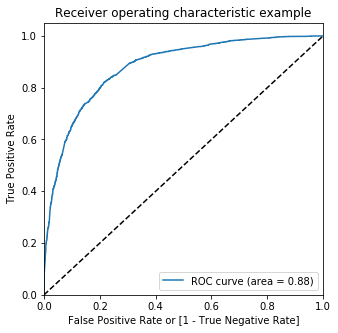

In [176]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Con_Prob)

### Let's find the optimal cut off point

In [177]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Con_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Con_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.328362,0,1,1,1,1,0,0,0,0,0,0
1,1,0.129959,0,1,1,0,0,0,0,0,0,0,0
2,0,0.120311,0,1,1,0,0,0,0,0,0,0,0
3,0,0.089055,0,1,0,0,0,0,0,0,0,0,0
4,0,0.034689,0,1,0,0,0,0,0,0,0,0,0


In [178]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384544  1.000000  0.000000
0.1   0.1  0.600399  0.975230  0.366201
0.2   0.2  0.746966  0.918098  0.640040
0.3   0.3  0.791366  0.836596  0.763105
0.4   0.4  0.801352  0.779065  0.815277
0.5   0.5  0.807497  0.692769  0.879181
0.6   0.6  0.799508  0.616460  0.913879
0.7   0.7  0.774005  0.495805  0.947828
0.8   0.8  0.750960  0.403116  0.968298
0.9   0.9  0.700108  0.238913  0.988268


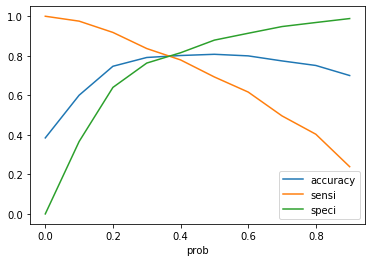

In [179]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

from the above curve seems that 0.3 is the optimal cut off point

In [180]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Con_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Con_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.328362,0,1,1,1,1,0,0,0,0,0,0,1
1,1,0.129959,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.120311,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.089055,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.034689,0,1,0,0,0,0,0,0,0,0,0,0


In [181]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7913658011983408

In [182]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3057,  949],
       [ 409, 2094]], dtype=int64)

In [183]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [184]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.836596084698362

In [185]:
# Let us calculate specificity
TN / float(TN+FP)

0.7631053419870195

### Let's check the Precision and Recall and it's tradeoff

In [186]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3057,  949],
       [ 409, 2094]], dtype=int64)

In [187]:
confusion[1,1]/(confusion[0,1]+confusion[1,1]) #precision

0.6881367071968452

In [188]:
confusion[1,1]/(confusion[1,0]+confusion[1,1]) #recall

0.836596084698362

In [189]:
from sklearn.metrics import precision_recall_curve

In [190]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Con_Prob)

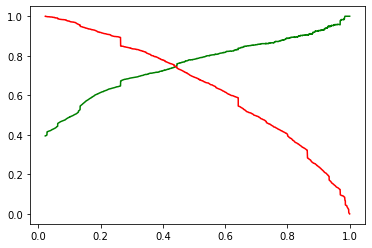

In [191]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Prediction


In [192]:
x_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_bing,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Resubscribed to emails,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
475,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2461,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
1890,0,169,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6007,0,94,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4052,0,150,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [193]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 475 to 2377
Data columns (total 18 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Do Not Email                                          2170 non-null   int64
 1   Total Time Spent on Website                           2170 non-null   int64
 2   Lead Source_Direct Traffic                            2170 non-null   uint8
 3   Lead Source_Google                                    2170 non-null   uint8
 4   Lead Source_Organic Search                            2170 non-null   uint8
 5   Lead Source_Reference                                 2170 non-null   uint8
 6   Lead Source_Referral Sites                            2170 non-null   uint8
 7   Lead Source_Welingak Website                          2170 non-null   uint8
 8   Lead Source_bing                                      2170 non-null   uint8


In [194]:
x_test.describe()

,Do Not Email,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_bing,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Resubscribed to emails,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
count,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.0,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000
mean,0.082488,478.133180,0.273272,0.323041,0.112903,0.063594,0.011060,0.014286,0.000922,0.051613,0.038249,0.102304,0.0,0.659908,0.123963,0.000922,0.235484,0.002765
std,0.275171,549.337896,0.445742,0.467746,0.316547,0.244085,0.104607,0.118693,0.030352,0.221295,0.191841,0.303118,0.0,0.473849,0.329615,0.030352,0.424399,0.052522
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,239.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,917.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2272.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [195]:
x_test[['Total Time Spent on Website']]=sc.fit_transform(x_test[['Total Time Spent on Website']])
#cannot use transform only as while modelling transformed three variables but here those variables are not available hence 
## did a fit-transform

In [196]:
x_test.describe()

,Do Not Email,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_bing,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Resubscribed to emails,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
count,2170.000000,2.170000e+03,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.0,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000
mean,0.082488,3.489272e-17,0.273272,0.323041,0.112903,0.063594,0.011060,0.014286,0.000922,0.051613,0.038249,0.102304,0.0,0.659908,0.123963,0.000922,0.235484,0.002765
std,0.275171,1.000230e+00,0.445742,0.467746,0.316547,0.244085,0.104607,0.118693,0.030352,0.221295,0.191841,0.303118,0.0,0.473849,0.329615,0.030352,0.424399,0.052522
min,0.000000,-8.705815e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-8.664847e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-4.345016e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,7.999960e-01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,3.266260e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [197]:
X_test_sm = sm.add_constant(x_test)

In [198]:
y_test_pred = res.predict(X_test_sm)

In [199]:
y_test_pred[:10]

475     0.864111
2461    0.996762
1890    0.076536
6007    0.302487
4052    0.387804
7587    0.147682
2066    0.062170
7285    0.244973
3269    0.062170
4817    0.566892
dtype: float64

In [200]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [201]:
y_test_df = pd.DataFrame(y_test)

In [202]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [203]:
y_pred_final.head()

,Converted,0
475,1,0.864111
2461,1,0.996762
1890,0,0.076536
6007,0,0.302487
4052,0,0.387804


In [204]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Con_Prob'})

In [205]:
y_pred_final['final_predicted'] = y_pred_final.Con_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [206]:
y_pred_final.head()

,Converted,Con_Prob,final_predicted
475,1,0.864111,1
2461,1,0.996762,1
1890,0,0.076536,0
6007,0,0.302487,1
4052,0,0.387804,1


In [207]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7829493087557604

In [208]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1027,  314],
       [ 157,  672]], dtype=int64)

In [209]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [210]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8106151990349819

In [211]:
# Let us calculate specificity
TN / float(TN+FP)

0.7658463832960477

### Our Model can predict successful conversion with 81% accuracy on new data